## データ分析

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

import time

In [9]:
df_tmp = pd.read_csv('preprocessed_data.csv')
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755 entries, 0 to 1754
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   物件名     1755 non-null   object 
 1   カテゴリー   1755 non-null   object 
 2   築年数     1755 non-null   int64  
 3   構造      1755 non-null   int64  
 4   階数      1755 non-null   int64  
 5   賃料      1755 non-null   float64
 6   管理費     1755 non-null   float64
 7   敷金      1755 non-null   float64
 8   礼金      1755 non-null   float64
 9   間取り     1755 non-null   object 
 10  面積      1755 non-null   float64
 11  23区     1755 non-null   object 
 12  都市名     1755 non-null   object 
 13  路線      1755 non-null   object 
 14  最寄駅     1755 non-null   object 
 15  徒歩      1755 non-null   int64  
dtypes: float64(5), int64(4), object(7)
memory usage: 219.5+ KB


In [10]:
### カテゴリ変数に変換
def trans_cate(df):
    transed_df=df.copy()
    cols=['カテゴリー','間取り', '23区', '都市名', '路線', '最寄駅']
    
    for col in cols:
        transed_df[col]=transed_df[col].astype('category')
    return transed_df

df=trans_cate(df_tmp)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755 entries, 0 to 1754
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   物件名     1755 non-null   object  
 1   カテゴリー   1755 non-null   category
 2   築年数     1755 non-null   int64   
 3   構造      1755 non-null   int64   
 4   階数      1755 non-null   int64   
 5   賃料      1755 non-null   float64 
 6   管理費     1755 non-null   float64 
 7   敷金      1755 non-null   float64 
 8   礼金      1755 non-null   float64 
 9   間取り     1755 non-null   category
 10  面積      1755 non-null   float64 
 11  23区     1755 non-null   category
 12  都市名     1755 non-null   category
 13  路線      1755 non-null   category
 14  最寄駅     1755 non-null   category
 15  徒歩      1755 non-null   int64   
dtypes: category(6), float64(5), int64(4), object(1)
memory usage: 152.2+ KB


In [11]:
df=df.drop('物件名', axis=1)
df.head()

,カテゴリー,築年数,構造,階数,賃料,管理費,敷金,礼金,間取り,面積,23区,都市名,路線,最寄駅,徒歩
0,賃貸マンション,0,11,2,80000.0,10000.0,0.0,0.0,1K,25.23,台東区,清川２,東京メトロ日比谷線,南千住駅,8
1,賃貸マンション,0,11,2,80000.0,10000.0,0.0,0.0,1K,25.23,台東区,清川２,東京メトロ日比谷線,南千住駅,8
2,賃貸マンション,0,11,11,84500.0,10000.0,0.0,0.0,1K,25.23,台東区,清川２,東京メトロ日比谷線,南千住駅,8
3,賃貸マンション,0,11,11,84500.0,10000.0,0.0,0.0,1K,25.23,台東区,清川２,東京メトロ日比谷線,南千住駅,8
4,賃貸マンション,0,11,8,132000.0,10000.0,0.0,13.2,2LDK,40.25,台東区,清川２,東京メトロ日比谷線,南千住駅,8


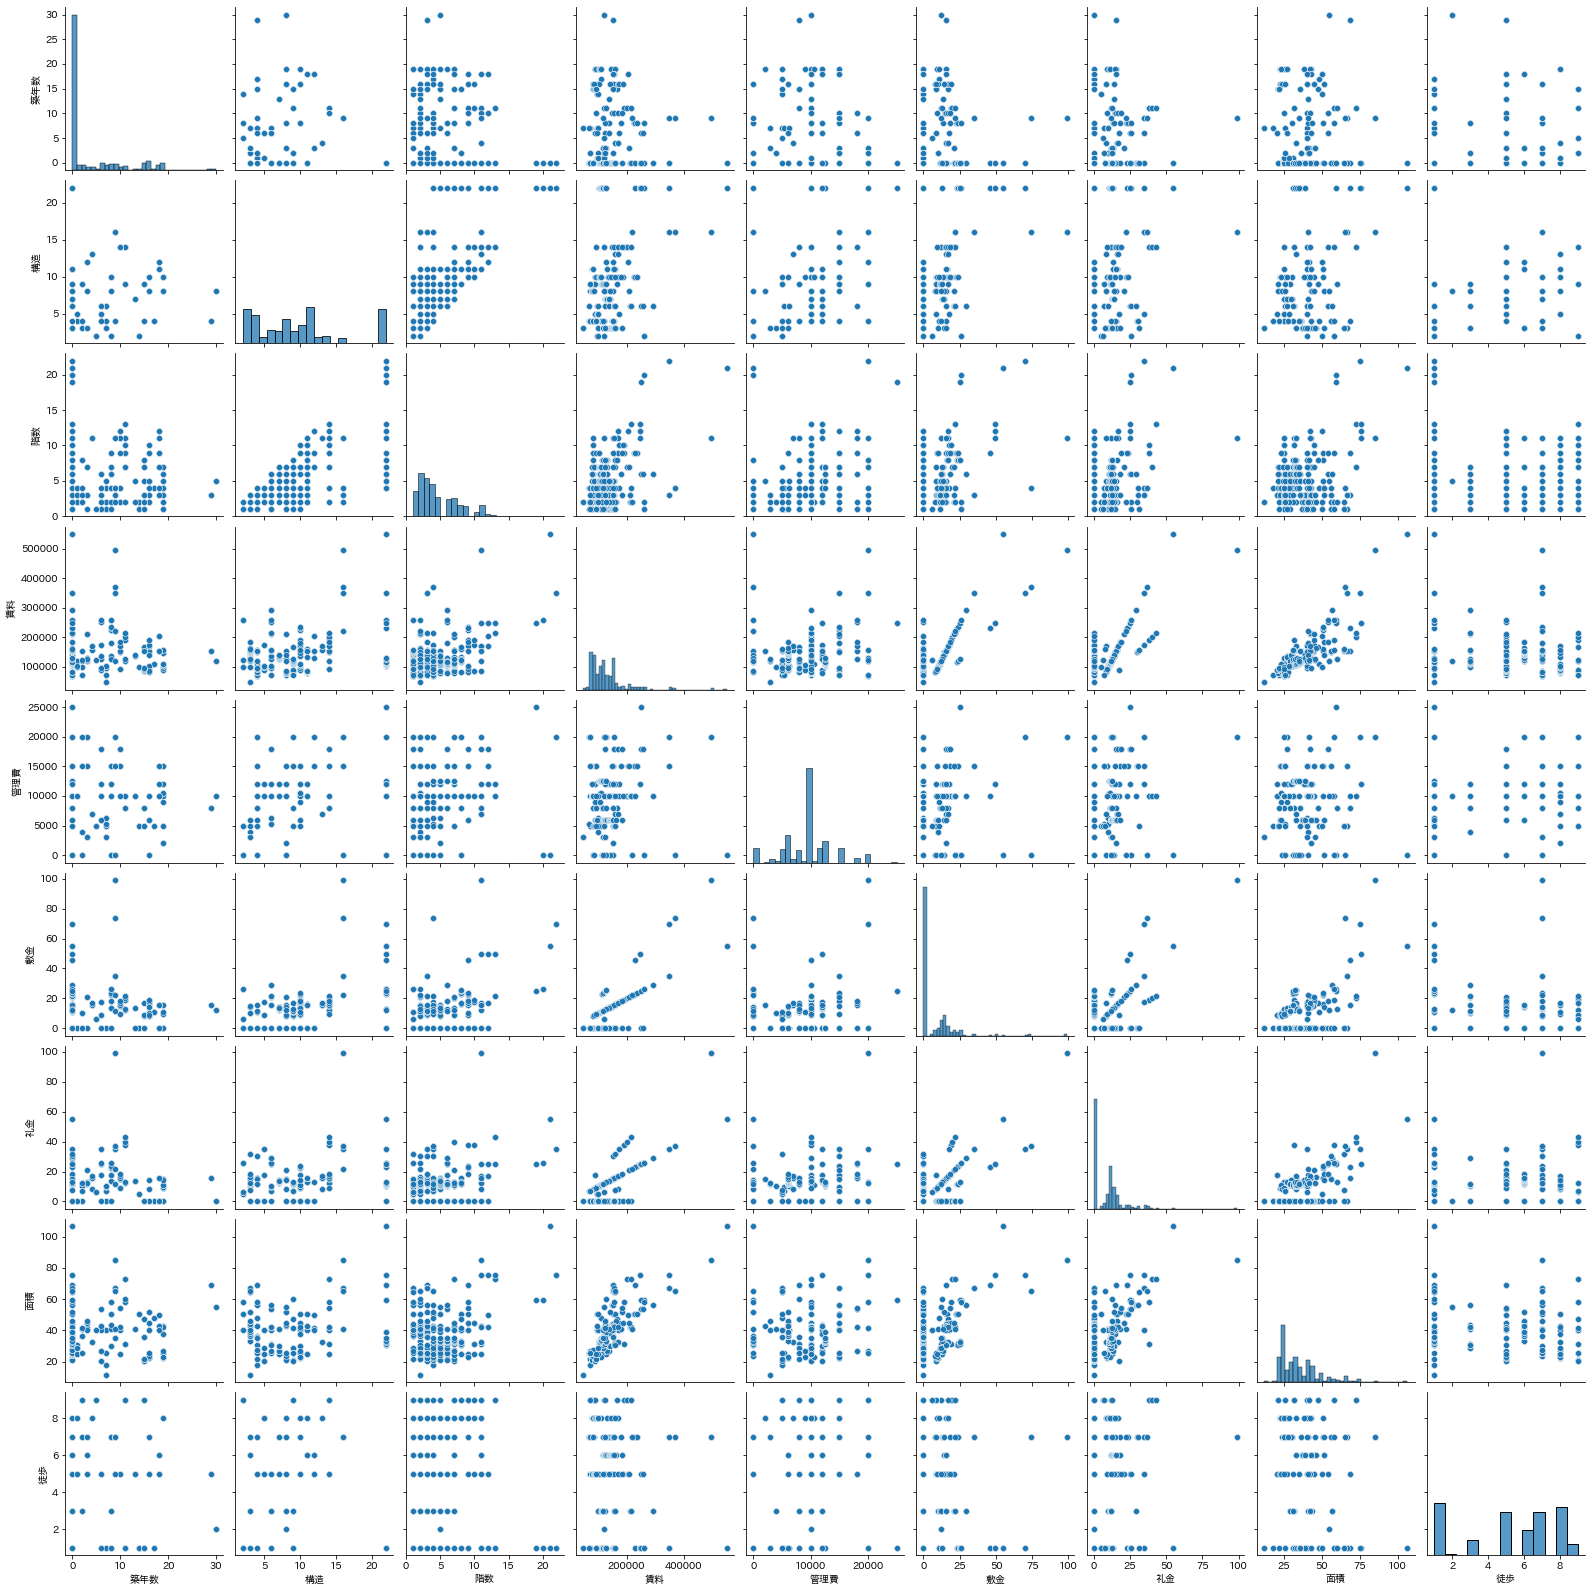

In [12]:
'''
ペアプロット
'''

sns.pairplot(df)
plt.show()

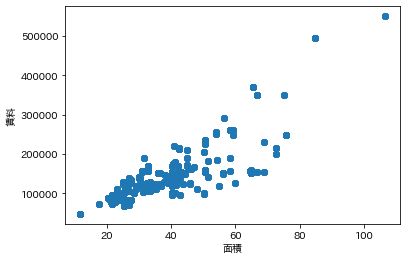

In [14]:
"""
面積と賃料
"""

plt.scatter(df['面積'], df['賃料'])
plt.xlabel('面積')
plt.ylabel('賃料')
plt.show()

面積が広い部屋ほど、賃料が高くなる

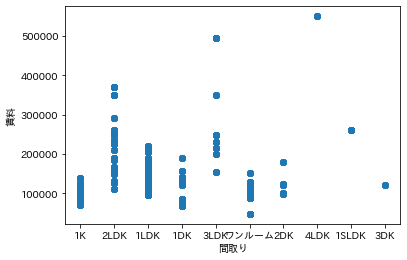

In [64]:
'''
間取りと賃料
'''

plt.scatter(df['間取り'], df['賃料'])
plt.xlabel('間取り')
plt.ylabel('賃料')
plt.show()

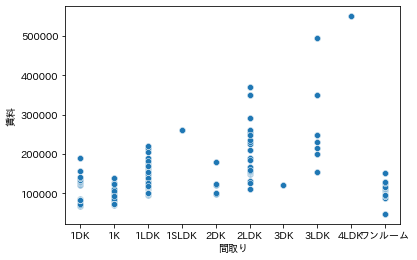

In [158]:
sns.scatterplot(x='間取り', y='賃料', data=df, legend=False)
plt.show()

部屋が多いと、賃料が高い

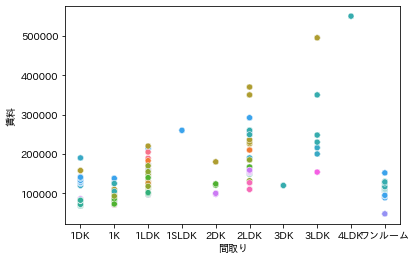

In [157]:
sns.scatterplot(x='間取り', y='賃料', hue='23区', data=df, legend=False)
plt.show()

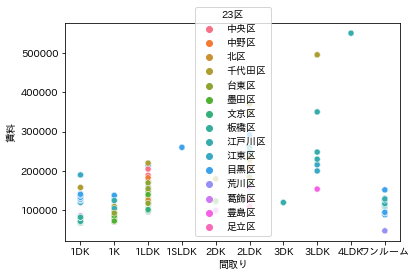

In [156]:
sns.scatterplot(x='間取り', y='賃料', hue='23区', data=df, legend=True)
plt.show()

In [251]:
'''
２３区の間取りごとの家賃の相場の確認
'''
wards=[]
datas=[]
madori_prices=[]
df_madori_prices=pd.DataFrame()


for ward in df['23区'].unique():
#     print(ward)
    data=df[df['23区']==ward].groupby('間取り').describe()['賃料']['mean']
    datas.append(data)
    wards.append(ward)
#     print(data)
#     madori_prices.append(data)
df_madori_prices['23区']=wards


for i in range(len(wards)):
    for j in range(len(data.keys())):
#     print(data.keys()[i])
#     print(datas[i][1])

        df_madori_prices[f'{data.keys()[j]}']
    
#         data_d={
# #             '23区':ward,
#             f'{data.keys()[i]}': data[i]
#         }
#         madori_prices.append(data_d)
    
    
#     for i,madori in enumerate(data.keys()):
#         print(madori)
#         print(i)
#         print(data[madori])
        
    
#         dic={
#             'ward_name': ward_name,
#             'mean_price': mean_price
#         }

#         ward_name=ward_prices.keys()[i]
#         mean_price=ward_prices[i]

#         data_d={
#             '23区': ward,
#             f'{madori}': data[madori],
#         }

#         madori_prices.append(data_d)

    
# df_madori_prices=pd.DataFrame(madori_prices)
df_madori_prices
# print('========================')
# madori_prices
# print(data_d)

82534.88372093023
70500.0
nan
72000.0
80687.5
129666.66666666667
78020.0
94200.0
nan
101625.0
nan
nan
115000.0
nan
nan


,23区
0,台東区
1,足立区
2,江東区
3,荒川区
4,墨田区
5,目黒区
6,葛飾区
7,中央区
8,豊島区
9,千代田区


In [253]:
len(data.keys())

10

In [241]:
wards

['台東区',
 '足立区',
 '江東区',
 '荒川区',
 '墨田区',
 '目黒区',
 '葛飾区',
 '中央区',
 '豊島区',
 '千代田区',
 '中野区',
 '板橋区',
 '江戸川区',
 '文京区',
 '北区']

In [173]:
madori_prices=[]

for i in range(len(ward_prices)):
#     print(ward_prices.keys()[i], ward_prices[i])
    ward_name=ward_prices.keys()[i]
    mean_price=ward_prices[i]
    
    d={
        'ward': ward_name,
        f'{madori}': mean_price,
    }
    
    madori_prices.append(d)
    
df_madori_prices=pd.DataFrame(madori_prices)
df_madori_prices

,ward,ワンルーム
0,中央区,144833.333333
1,中野区,138638.888889
2,北区,122666.666667
3,千代田区,209534.482759
4,台東区,99089.285714
5,墨田区,110620.000000
6,文京区,99800.000000
7,板橋区,91611.111111
8,江戸川区,141423.076923
9,江東区,183200.000000


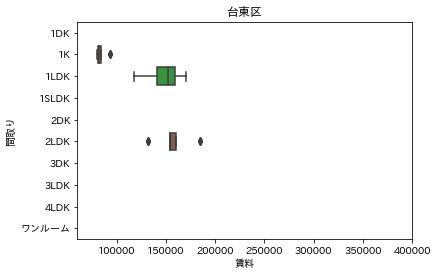

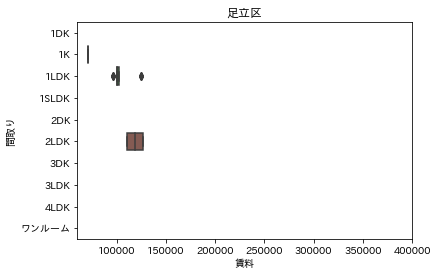

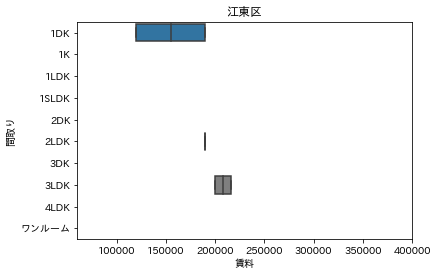

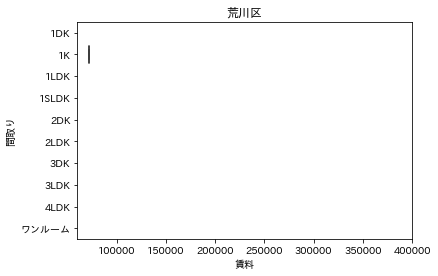

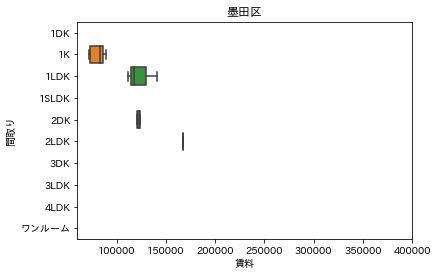

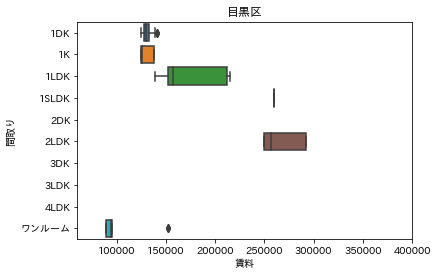

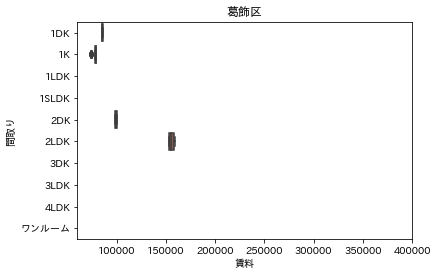

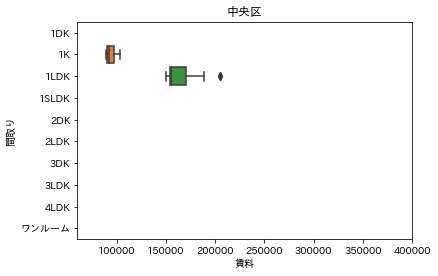

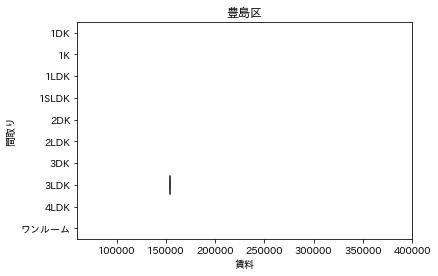

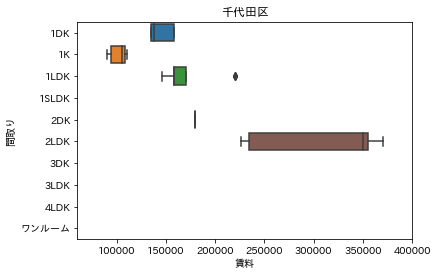

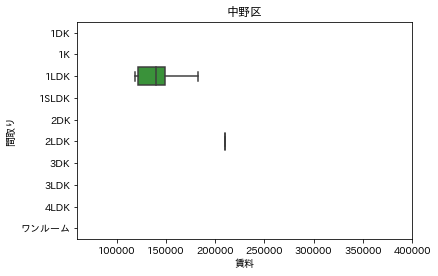

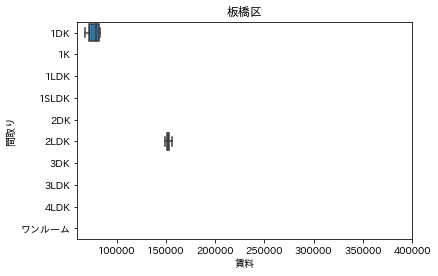

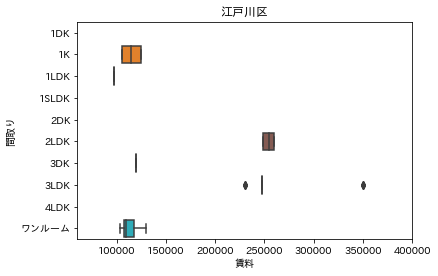

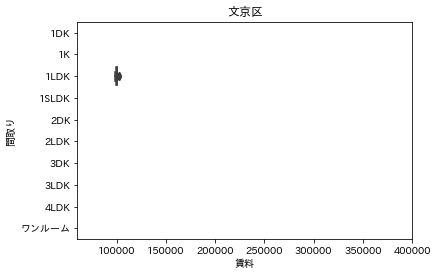

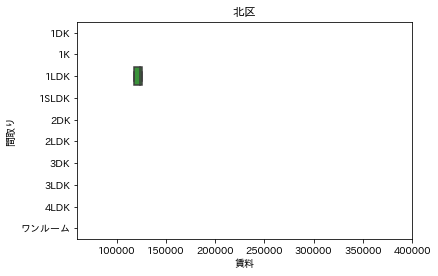

In [152]:
'''
23区ごとの間取り別賃料の箱ひげ図
'''

wards=df['23区'].unique()

for ward in wards:
    plt.title(f'{ward}')
    sns.boxplot(x='賃料', y='間取り', data=df[df['23区']==ward])
    plt.xlim(60000, 400000)
    plt.show()


目黒区、千代田区、江東区はばらつきが大きく、賃料は高め 

都心から離れた場所では上記の逆

In [32]:
print(df['23区'].value_counts())
# ward_prices=df.groupby(['23区']).mean()['賃料'].sort_values(ascending=False)
ward_prices=df.groupby(['23区']).mean()['賃料']

台東区     280
江戸川区    260
目黒区     230
中野区     180
葛飾区     180
千代田区    145
板橋区     135
墨田区     125
中央区      90
足立区      45
文京区      25
江東区      25
北区       15
荒川区      15
豊島区       5
Name: 23区, dtype: int64


In [56]:
'''
区ごとの賃料の平均
'''

mean_prices_wards=[]

for i in range(len(ward_prices)):
#     print(ward_prices.keys()[i], ward_prices[i])
    ward_name=ward_prices.keys()[i]
    mean_price=ward_prices[i]
    
    d={
        'ward_name': ward_name,
        'mean_price': mean_price
    }
    
    mean_prices_wards.append(d)
    
df_=pd.DataFrame(mean_prices_wards)

In [161]:
df_

,ward_name,mean_price
0,中央区,144833.333333
1,中野区,138638.888889
2,北区,122666.666667
3,千代田区,209534.482759
4,台東区,99089.285714
5,墨田区,110620.000000
6,文京区,99800.000000
7,板橋区,91611.111111
8,江戸川区,141423.076923
9,江東区,183200.000000


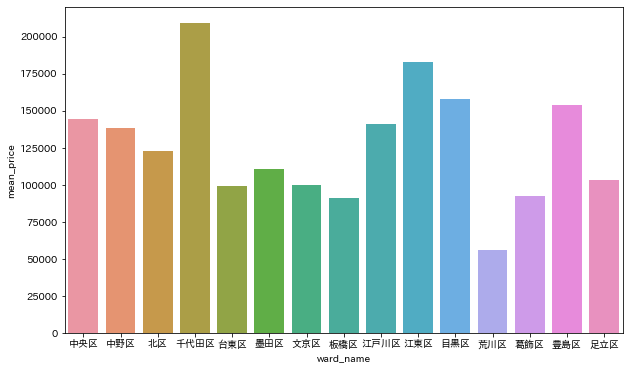

In [63]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_, x='ward_name', y='mean_price')
plt.show()

中央区、千代田区、江東区、目黒区は高い 

都心へのアクセスがいい部屋は高い傾向にある

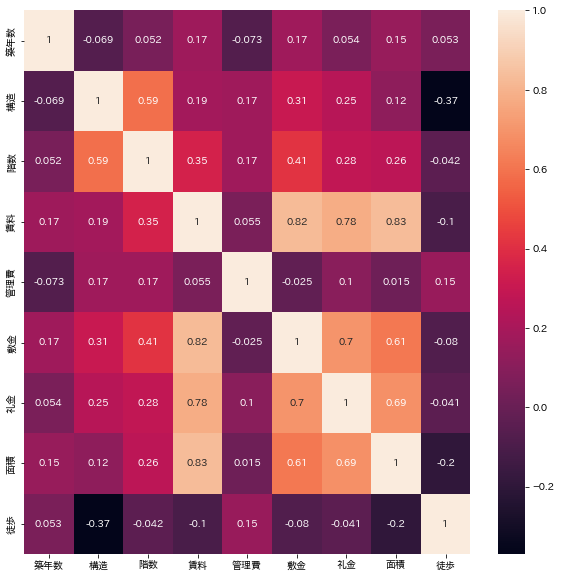

In [62]:
'''
各特徴量間の相関係数の確認
'''

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

## 賃料が高い部屋の特徴 
敷金、礼金が高い 

面積が広い 

階数が高い 

23区のうち都心部、もしくは都心に近い 

部屋が多い間取り 

主要路線の駅に近い（イメージ）

### →予測に大きく影響しそう